In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf

In [2]:
# colnames = ['day','order_id','item_det_info','pay_timestamp','buyer_id','promise_speed','if_cainiao','merchant_id','Logistics_review_score']
data = pd.read_csv("../replication/mic_bin.csv").drop(columns = ['Unnamed: 0','level_0']).rename(columns = {'fraction':'action_time','Days':'day_count'})
data.head()

,order_id,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp,day,...,facility_count,week,day_values,day_of_week,recieve_count,arrive_count,depart_count,scan_count,consign_count,post_action_time
0,100534527,20170115,53756568.0,CONSIGN,NaN,NaN,NaN,532.0,2017-01-16 08:49:00,20170115,...,1.0,3.0,15.0,1.0,1.0,2.0,1.0,0.0,1.0,0.409264
1,100534527,20170115,53756568.0,SIGNED,112694.0,NaN,NaN,532.0,2017-01-19 16:51:00,20170115,...,1.0,3.0,15.0,1.0,1.0,2.0,1.0,0.0,1.0,0.409264
2,100534527,20170115,53756568.0,GOT,NaN,NaN,NaN,532.0,2017-01-16 18:00:00,20170115,...,1.0,3.0,15.0,1.0,1.0,2.0,1.0,0.0,1.0,0.409264
3,100534527,20170115,53756568.0,DEPARTURE,NaN,NaN,NaN,532.0,2017-01-17 06:54:00,20170115,...,1.0,3.0,15.0,1.0,1.0,2.0,1.0,0.0,1.0,0.409264
4,100534527,20170115,53756568.0,ARRIVAL,NaN,NaN,NaN,532.0,2017-01-17 06:25:00,20170115,...,1.0,3.0,15.0,1.0,1.0,2.0,1.0,0.0,1.0,0.409264


In [3]:
data.columns

Index(['order_id', 'order_date', 'logistic_order_id', 'action', 'facility_id',
       'facility_type', 'city_id', 'logistic_company_id', 'timestamp', 'day',
       'item_det_info', 'pay_timestamp', 'buyer_id', 'promise_speed',
       'if_cainiao', 'merchant_id', 'Logistics_review_score', 'min', 'max',
       'action_time', 'day_count', 'avg_action_time', 'action_count',
       'facility_count', 'week', 'day_values', 'day_of_week', 'recieve_count',
       'arrive_count', 'depart_count', 'scan_count', 'consign_count',
       'post_action_time'],
      dtype='object')

In [4]:
df = data[['order_id','week','action_count','day_count','facility_count','arrive_count','depart_count','recieve_count','scan_count','Logistics_review_score']].drop_duplicates()
df.head(10)

,order_id,week,action_count,day_count,facility_count,arrive_count,depart_count,recieve_count,scan_count,Logistics_review_score
0,100534527,3.0,5.0,4,1.0,2.0,1.0,1.0,0.0,5.0
7,60175737,2.0,8.0,2,1.0,2.0,2.0,1.0,2.0,5.0
17,34518067,4.0,5.0,1,1.0,1.0,1.0,1.0,1.0,5.0
24,111264400,1.0,9.0,2,1.0,2.0,3.0,1.0,2.0,5.0
35,9815812,1.0,5.0,2,1.0,1.0,1.0,1.0,1.0,5.0
42,106714580,5.0,5.0,5,1.0,1.0,1.0,1.0,1.0,5.0
49,37183351,3.0,6.0,3,1.0,2.0,1.0,1.0,1.0,5.0
57,80040990,1.0,9.0,1,1.0,3.0,3.0,1.0,1.0,5.0
68,110202042,2.0,7.0,1,1.0,3.0,1.0,1.0,1.0,5.0
77,8571614,1.0,4.0,1,1.0,1.0,0.0,1.0,1.0,5.0


# check records & clean

In [5]:
df.week.value_counts()

25.0    1514
2.0     1400
22.0    1103
6.0     1096
7.0     1077
19.0    1005
10.0     994
20.0     982
1.0      979
8.0      942
17.0     897
18.0     897
14.0     878
15.0     875
9.0      843
21.0     833
16.0     810
13.0     802
12.0     790
11.0     755
3.0      754
23.0     729
29.0     703
5.0      699
28.0     650
27.0     650
24.0     633
30.0     612
26.0     544
4.0      190
31.0      40
Name: week, dtype: int64

In [6]:
# drop 31 week
df = df.drop(df.query('week == 31').index)

In [21]:
# Action Count
df.action_count.value_counts()

5.0     8753
7.0     5550
6.0     3441
4.0     2374
8.0     2195
9.0     2167
10.0     819
Name: action_count, dtype: int64

In [84]:
df.day_count.value_counts()

1    10229
2     8946
3     3833
4     1087
0      623
5      400
6      181
Name: day_count, dtype: int64

In [8]:
# drop 8 9 10
df = df.drop(df.query('day_count in (7,8,9,10)').index)

In [9]:
# Facility Count
df.facility_count.value_counts()

1.0    8431
2.0    6887
4.0    4042
3.0    3607
5.0    1625
0.0     559
6.0     275
7.0      24
8.0       3
Name: facility_count, dtype: int64

In [10]:
# drop 7 8
df = df.drop(df.query('facility_count in (7,8)').index)

In [11]:
# Arrive Count
df.arrive_count.value_counts()

1.0    11565
2.0     8385
3.0     2812
0.0     2237
4.0      416
5.0        9
6.0        2
Name: arrive_count, dtype: int64

In [12]:
# drop 5 6
df = df.drop(df.query('arrive_count in (5,6)').index)

In [13]:
# Depart Count
df.depart_count.value_counts()

1.0    12070
2.0     6555
3.0     3203
0.0     2743
4.0      762
5.0       80
6.0        2
Name: depart_count, dtype: int64

In [14]:
# drop 5 6
df = df.drop(df.query('depart_count in (5,6)').index)

In [15]:
# Receive Count ?? only have one
df.recieve_count.value_counts()

1.0    25333
Name: recieve_count, dtype: int64

In [16]:
# Scan Count
df.scan_count.value_counts()

1.0    23299
2.0     1365
0.0      475
3.0      160
4.0       29
5.0        5
Name: scan_count, dtype: int64

In [17]:
# drop 4 5
df = df.drop(df.query('scan_count in (4,5)').index)

## action count[t, t + 0.05)


In [18]:
# colnames = ['day','order_id','item_det_info','pay_timestamp','buyer_id','promise_speed','if_cainiao','merchant_id','Logistics_review_score']
ac_inter = pd.read_csv("../replication/mic_bin_interval_ac.csv").drop(columns = ['Unnamed: 0','fraction']).drop_duplicates()
ac_inter.head()

,order_id,0-0.05,0.05-0.1,0.1-0.15,0.15-0.2,0.2-0.25,0.25-0.3,0.3-0.35,0.35-0.4,0.4-0.45,...,0.5-0.55,0.55-0.6,0.6-0.65,0.65-0.7,0.7-0.75,0.75-0.8,0.8-0.85,0.85-0.9,0.9-0.95,0.95-1
0,100534527,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,60175737,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0
17,34518067,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
24,111264400,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
35,9815812,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [19]:
# join
df_cleaned = df.merge(ac_inter, on = 'order_id', how = 'inner')
df_cleaned

,order_id,week,action_count,day_count,facility_count,arrive_count,depart_count,recieve_count,scan_count,Logistics_review_score,...,0.5-0.55,0.55-0.6,0.6-0.65,0.65-0.7,0.7-0.75,0.75-0.8,0.8-0.85,0.85-0.9,0.9-0.95,0.95-1
0,100534527,3.0,5.0,4,1.0,2.0,1.0,1.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,60175737,2.0,8.0,2,1.0,2.0,2.0,1.0,2.0,5.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0
2,34518067,4.0,5.0,1,1.0,1.0,1.0,1.0,1.0,5.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,111264400,1.0,9.0,2,1.0,2.0,3.0,1.0,2.0,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,9815812,1.0,5.0,2,1.0,1.0,1.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25294,77554025,27.0,7.0,3,2.0,2.0,2.0,1.0,1.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
25295,127327610,27.0,8.0,1,2.0,2.0,1.0,1.0,2.0,5.0,...,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
25296,117994338,30.0,6.0,2,2.0,2.0,1.0,1.0,1.0,5.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
25297,1587221,29.0,5.0,2,2.0,1.0,1.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [22]:
df_cleaned.columns

Index(['order_id', 'week', 'action_count', 'day_count', 'facility_count',
       'arrive_count', 'depart_count', 'recieve_count', 'scan_count',
       'Logistics_review_score', '0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2',
       '0.2-0.25', '0.25-0.3', '0.3-0.35', '0.35-0.4', '0.4-0.45', '0.45-0.5',
       '0.5-0.55', '0.55-0.6', '0.6-0.65', '0.65-0.7', '0.7-0.75', '0.75-0.8',
       '0.8-0.85', '0.85-0.9', '0.9-0.95', '0.95-1'],
      dtype='object')

# regression
## no seperation with action count, no control variables

In [23]:
df_cleaned['0-0.05'].value_counts()

1.0    19467
2.0     4983
3.0      603
4.0      224
5.0       18
6.0        4
Name: 0-0.05, dtype: int64

In [24]:
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm

# Choose the features to be used
cols = ['week', 'day_count', 'facility_count', 'arrive_count',
       'depart_count', 'recieve_count', 'scan_count', '0-0.05']
X_train = df_cleaned[cols]
y_train = df_cleaned['Logistics_review_score']

# We must add an intercept as the standard model doesn't automatically fit one 1s
X_train = sm.add_constant(X_train)

# fit the data to the model
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Logistics_review_score   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.009
Method:                     Least Squares   F-statistic:                     34.63
Date:                    Mon, 01 Nov 2021   Prob (F-statistic):           1.99e-48
Time:                            10:54:37   Log-Likelihood:                -23009.
No. Observations:                   25299   AIC:                         4.603e+04
Df Residuals:                       25291   BIC:                         4.610e+04
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
week

In [26]:
model.params

week              0.001194
day_count        -0.055519
facility_count   -0.004318
arrive_count     -0.003794
depart_count      0.014864
recieve_count     4.943085
scan_count       -0.026153
0-0.05            0.004630
dtype: float64

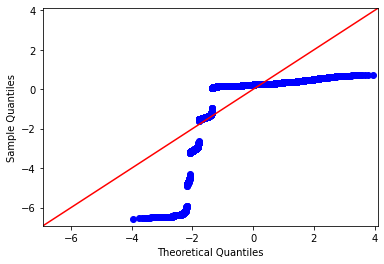

In [27]:
# 残差项是否服从正态分布 qqplot也就是Quantile-Quantile Plots。是通过比较两个概率分布的分位数对这两个概率分布进行比较的概率图方法。

from matplotlib import pyplot as plt
fig = sm.qqplot(model.resid, fit=True, line="45")
plt.show()

In [28]:
def reg(df, col):
    X_train = df[col]
    y_train = df['Logistics_review_score']

    # We must add an intercept as the standard model doesn't automatically fit one 1s
    X_train = sm.add_constant(X_train)

    # fit the data to the model
    model = sm.OLS(y_train, X_train).fit()
    return model.params[col]

In [29]:
reg(df_cleaned, '0.05-0.1')

-0.00969539022804649

In [30]:
# regression
act_times = ['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3',
       '0.3-0.35', '0.35-0.4', '0.4-0.45', '0.45-0.5', '0.5-0.55', '0.55-0.6',
       '0.6-0.65', '0.65-0.7', '0.7-0.75', '0.75-0.8', '0.8-0.85', '0.85-0.9',
       '0.9-0.95', '0.95-1']
param = {}
for i in act_times:
    param[i] = reg(df_cleaned, i)

param_df = pd.DataFrame.from_dict(param, orient='index', columns=['coefficient'])

<AxesSubplot:>

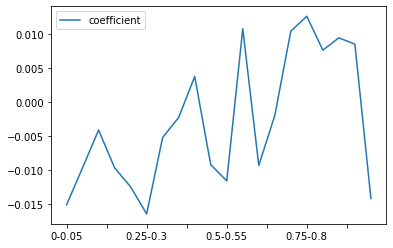

In [31]:
param_df.plot()

## seperate with action count, no control variables

In [78]:
# different action count * regression
act_times = ['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3',
       '0.3-0.35', '0.35-0.4', '0.4-0.45', '0.45-0.5', '0.5-0.55', '0.55-0.6',
       '0.6-0.65', '0.65-0.7', '0.7-0.75', '0.75-0.8', '0.8-0.85', '0.85-0.9',
       '0.9-0.95', '0.95-1']
act_param = {}
l = [[] for i in range(len(act_times))]
cnt = [i for i in range(4,11)]
for i, n in enumerate(cnt):
# 取出对应 action_count
    act_df = df_cleaned[df_cleaned['action_count'] == n]
    for j in act_times:
        l[i].append(reg(act_df, j))
    act_param['action count = ' + str(n)] = l[i]

param_df = pd.DataFrame(act_param, index=act_times)

In [80]:
param_df

,action count = 4,action count = 5,action count = 6,action count = 7,action count = 8,action count = 9,action count = 10
0-0.05,-0.016314,-0.012432,-0.016881,-0.016678,-0.057170,0.013776,0.060625
0.05-0.1,-0.018151,-0.014280,-0.006972,0.007363,-0.013535,-0.020865,0.025953
0.1-0.15,0.000799,-0.009982,0.015399,0.002389,0.000810,0.007622,-0.037879
0.15-0.2,-0.020543,-0.013856,0.009644,0.014201,-0.008610,-0.000831,-0.053319
0.2-0.25,-0.018847,-0.011690,0.002961,-0.008065,0.020491,-0.016313,-0.052572
0.25-0.3,0.009955,-0.022411,-0.018817,-0.024441,0.012054,-0.008119,-0.019165
0.3-0.35,-0.002650,0.005168,-0.010805,0.007674,-0.021620,-0.010115,-0.018844
0.35-0.4,-0.006225,0.003556,0.020060,0.012093,-0.016179,-0.023796,0.001066
0.4-0.45,0.007375,0.027365,0.002741,-0.016781,-0.010559,0.004915,0.029360
0.45-0.5,0.011913,-0.005190,-0.016423,-0.015478,-0.004791,0.025641,-0.068469


In [81]:
param_df['action count = 4']

0-0.05     -0.016314
0.05-0.1   -0.018151
0.1-0.15    0.000799
0.15-0.2   -0.020543
0.2-0.25   -0.018847
0.25-0.3    0.009955
0.3-0.35   -0.002650
0.35-0.4   -0.006225
0.4-0.45    0.007375
0.45-0.5    0.011913
0.5-0.55   -0.016398
0.55-0.6   -0.016170
0.6-0.65    0.041346
0.65-0.7    0.026226
0.7-0.75   -0.008598
0.75-0.8    0.037404
0.8-0.85    0.028727
0.85-0.9    0.005234
0.9-0.95    0.003160
0.95-1      0.013996
Name: action count = 4, dtype: float64

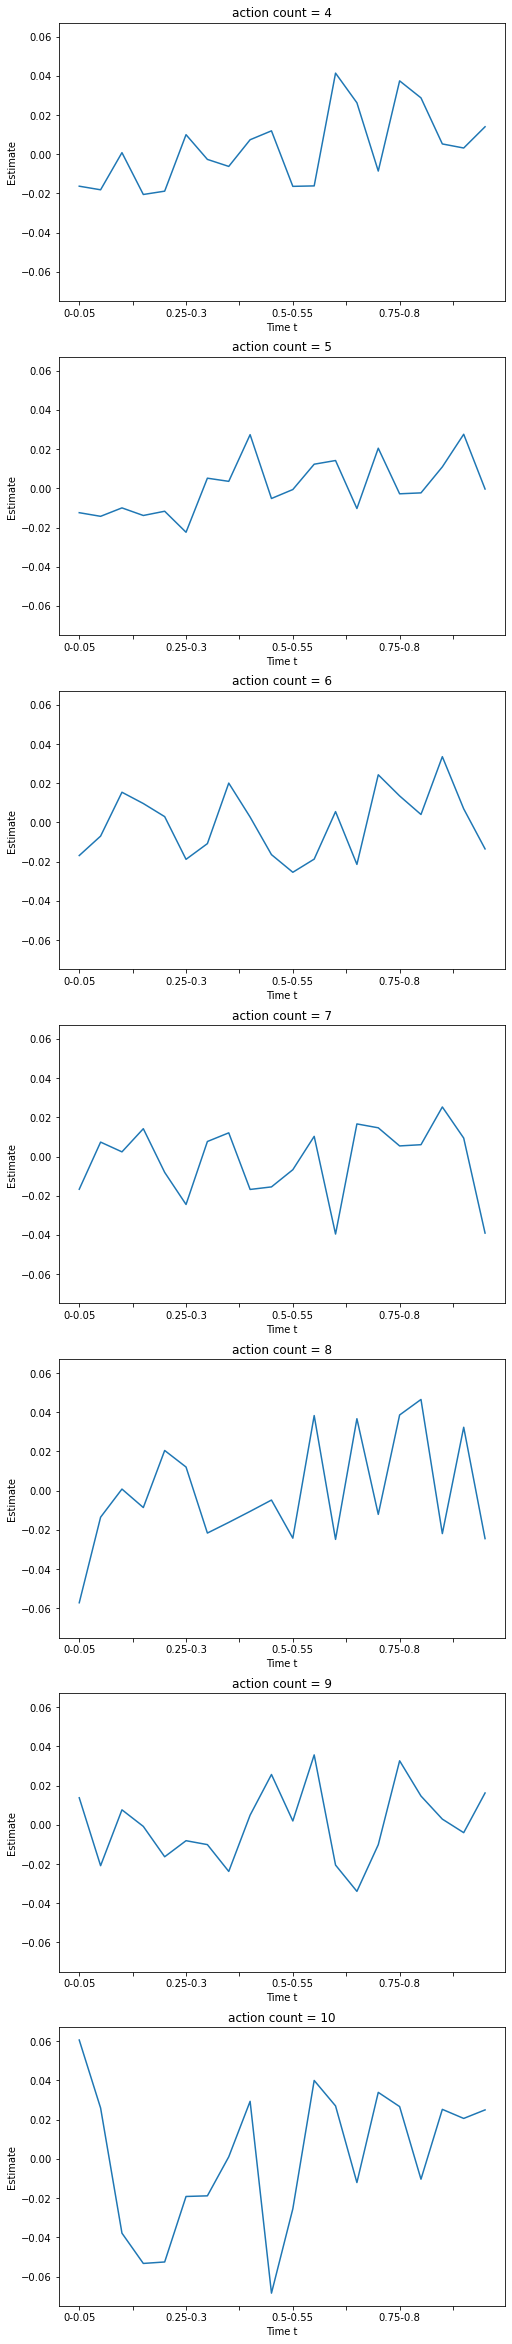

In [83]:
nx = 1
ny = 7

dxs = 8.0
dys = 6.0


fig, ax = plt.subplots(ny, nx, sharey = True, figsize=(dxs*nx, dys*ny) )


for i in range(ny):
    c = param_df.columns[i]
    param_df[c].plot(kind = 'line', ax = ax[i])
    ax[i].set_xlabel('Time t') 
    ax[i].set_ylabel('Estimate') 
    ax[i].set_title(param_df.columns[i])

plt.savefig('Regression1-coef.jpg', dpi=300)

## seperate with day count, no control variables

In [92]:
# different action count * regression
act_times = ['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3',
       '0.3-0.35', '0.35-0.4', '0.4-0.45', '0.45-0.5', '0.5-0.55', '0.55-0.6',
       '0.6-0.65', '0.65-0.7', '0.7-0.75', '0.75-0.8', '0.8-0.85', '0.85-0.9',
       '0.9-0.95', '0.95-1']
day_param = {}
l = [[] for i in range(len(act_times))]
cnt = [i for i in range(3,7)]

# 3-6 day count
for i, n in enumerate(cnt):
# 取出对应 day_count
    day_df = df_cleaned[df_cleaned['day_count'] == n]
    for j in act_times:
        l[i].append(reg(day_df, j))
    day_param['day count = ' + str(n)] = l[i]

In [111]:
# 0-2 合并
day_012 = df_cleaned.query('day_count in (0,1,2)')
ll = [reg(day_012, i) for i in act_times]
day_param['day count = 0-2'] = ll
# sort
day_params = {}
for i in sorted(day_param):
    day_params[i] = day_param[i]
day_params

param_df2 = pd.DataFrame(day_params, index=act_times)

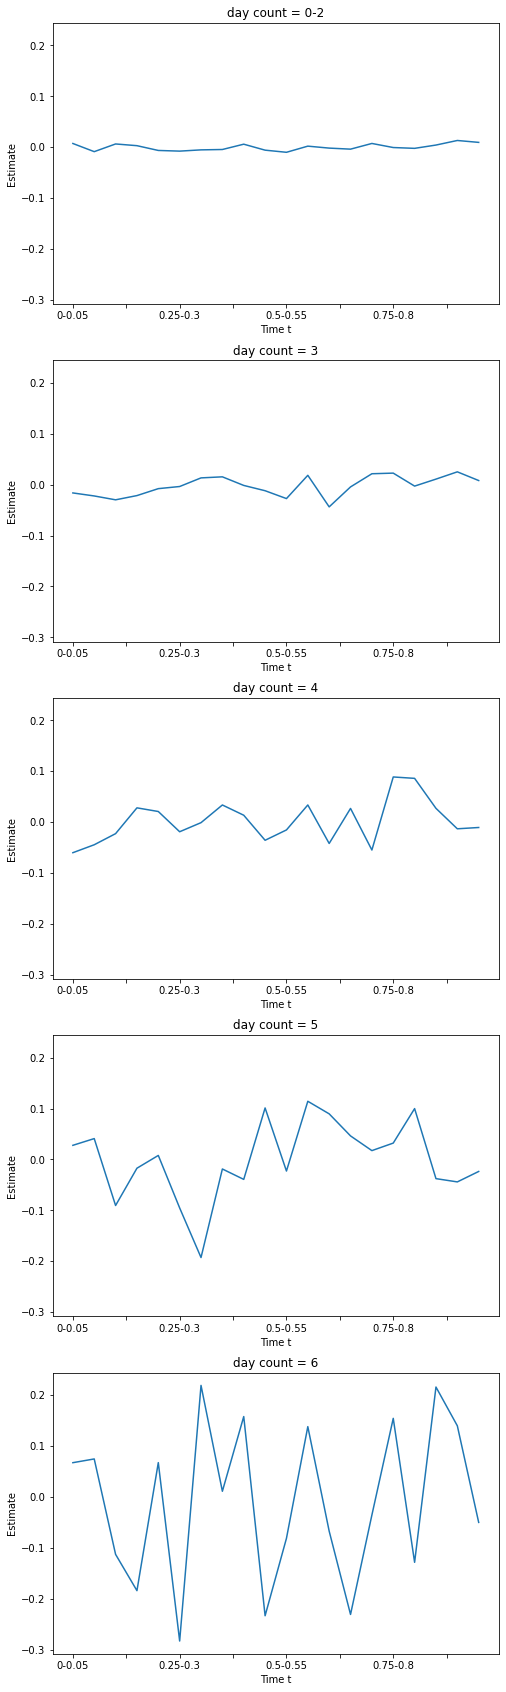

In [112]:
nx = 1
ny = 5

dxs = 8.0
dys = 6.0


fig, ax = plt.subplots(ny, nx, sharey = True, figsize=(dxs*nx, dys*ny) )


for i in range(ny):
    c = param_df2.columns[i]
    param_df2[c].plot(kind = 'line', ax = ax[i])
    ax[i].set_xlabel('Time t') 
    ax[i].set_ylabel('Estimate') 
    ax[i].set_title(param_df2.columns[i])

plt.savefig('Regression1-coef2.jpg', dpi=300)